# Imports

In [175]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Configuration

In [177]:
dataset_path = 'audio/files'
emotions = ['euphoric', 'joyfully', 'sad', 'surprised']
valid_ext = ('.wav',)


# Load and preprocess audio

In [179]:
data = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.lower().endswith(valid_ext):
                label = file.split('.')[0]
                if label in emotions:
                    file_path = os.path.join(folder_path, file)
                    signal, sr = librosa.load(file_path, sr=None)
                    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
                    mfccs_scaled = np.mean(mfccs.T, axis=0)
                    data.append([mfccs_scaled, label])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['mfccs', 'label'])
X = np.vstack(df['mfccs'].values)
y = df['label'].values

print("Total samples loaded:", len(X))


Total samples loaded: 68


# Prepare dataset

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train model

In [184]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    euphoric       0.00      0.00      0.00         5
    joyfully       1.00      0.17      0.29         6
         sad       0.00      0.00      0.00         2
   surprised       0.00      0.00      0.00         1

    accuracy                           0.07        14
   macro avg       0.25      0.04      0.07        14
weighted avg       0.43      0.07      0.12        14



# Build Neural Network

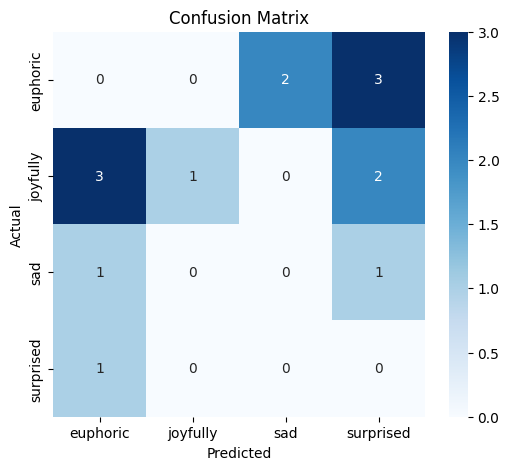

In [186]:
cm = confusion_matrix(y_test, y_pred, labels=emotions)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=emotions, yticklabels=emotions, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Evaluate model

In [188]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 4)

# Plot training history

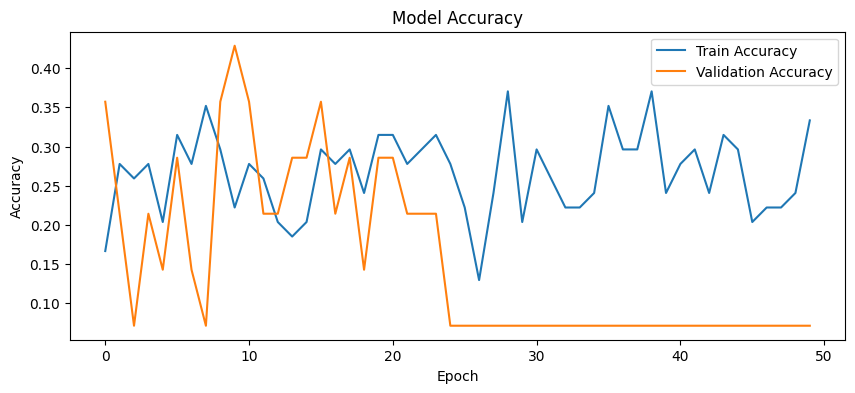

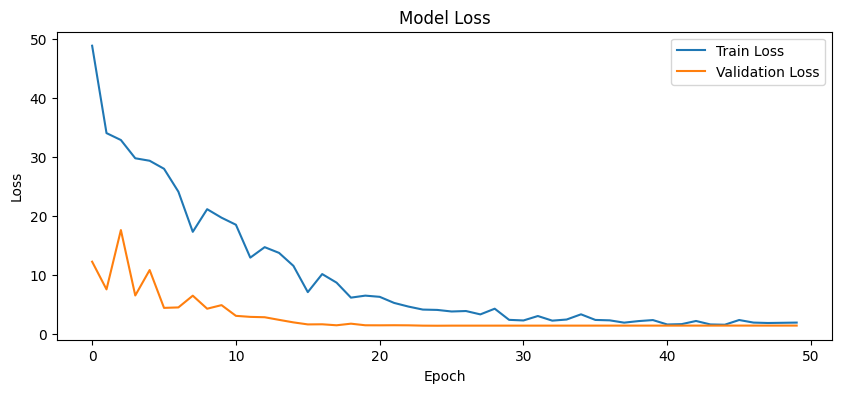

In [163]:
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict emotion for a new audio file

In [190]:
def predict_emotion(file_path):
    signal, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    mfccs_scaled = scaler.transform([mfccs_scaled])
    pred = clf.predict(mfccs_scaled)
    return pred[0]

example_file = 'audio/files/00026029e0--64992143ffab6240f9f3787a/euphoric.wav'
print("Predicted emotion:", predict_emotion(example_file))


Predicted emotion: euphoric


# Example prediction

In [199]:
example_file = 'audio/files/00026029e0--64992143ffab6240f9f3787a/euphoric.wav'
print("Predicted emotion:", predict_emotion(example_file))

Predicted emotion: euphoric
